In [1]:
#pip install pandas-datareader

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime 

In [2]:
#pip install --upgrade pandas

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [5]:
df_tesla.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-17,60.799999,59.736000,60.540001,60.287998,20693500.0,60.287998
2017-04-18,60.167999,59.580002,59.939999,60.049999,15178500.0,60.049999
2017-04-19,61.324001,60.422001,60.492001,61.104000,19490000.0,61.104000


In [6]:
df_tesla.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990
2022-04-11,1008.469971,974.640015,980.400024,975.929993,19785700.0,975.929993
2022-04-12,1021.190002,976.599976,997.640015,986.950012,21948800.0,986.950012


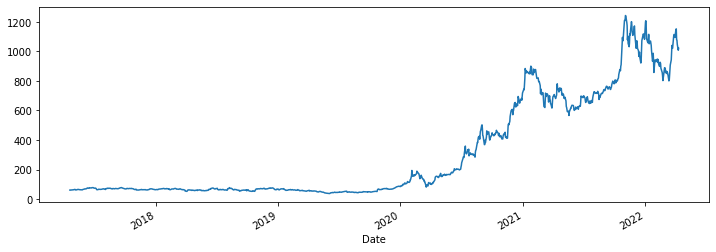

In [10]:
df_tesla['High'].plot(figsize=(12,4))

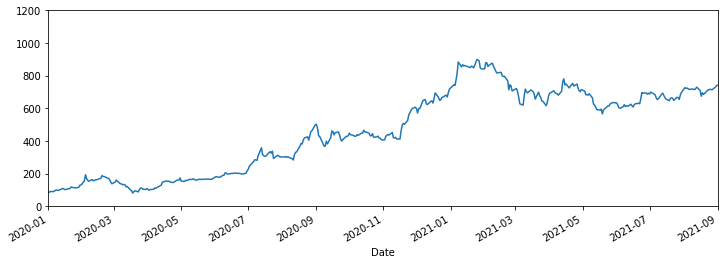

In [19]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,1200],figsize=(12,4))

In [23]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index

In [24]:
df_tesla.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [25]:
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [26]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

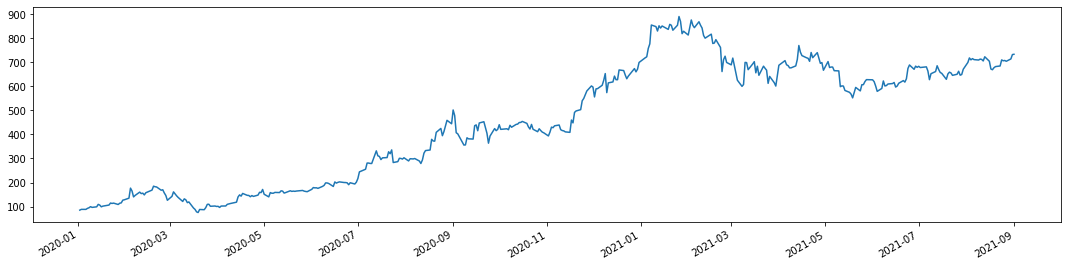

In [32]:
fig,ax=plt.subplots(figsize=(15,4))
#increase padding
plt.tight_layout()
#Prevent overlapping
fig.autofmt_xdate()
ax.plot(index,share_open)

In [33]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-04-17 to 2022-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 101.1 KB


In [34]:
df_tesla = df_tesla.reset_index()

In [35]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [36]:
df_tesla = df_tesla.set_index(df_tesla['Date'],drop=True)

In [37]:
df_tesla.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2017-04-17,2017-04-17,60.799999,59.736000,60.540001,60.287998,20693500.0,60.287998
2017-04-18,2017-04-18,60.167999,59.580002,59.939999,60.049999,15178500.0,60.049999
2017-04-19,2017-04-19,61.324001,60.422001,60.492001,61.104000,19490000.0,61.104000


In [39]:
date = datetime.now()

In [40]:
date.day

13

In [41]:
date.time

<function datetime.time>

In [43]:
date.month

4

In [44]:
date.weekday()

2

# Time Resampling

In [47]:
# Min value for each column for every year
#A = year end frequency
df_tesla.resample(rule='A').min()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2017-12-31,2017-04-17,60.167999,58.152000,59.599998,59.091999,15178500.0,59.091999
2018-12-31,2018-01-02,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,2019-01-02,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,2020-01-02,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,2021-01-04,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,2022-01-03,800.700012,700.000000,700.390015,764.039978,16330900.0,764.039978


In [52]:
# Max value for each column for every year
#A = year end frequency
df_tesla.resample(rule='A').max()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2017-12-31,2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,2022-04-12,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


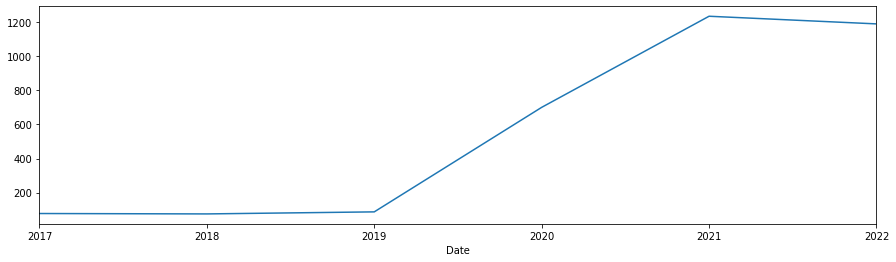

In [51]:
df_tesla.resample(rule='A').max()['Open'].plot(figsize=(15,4))

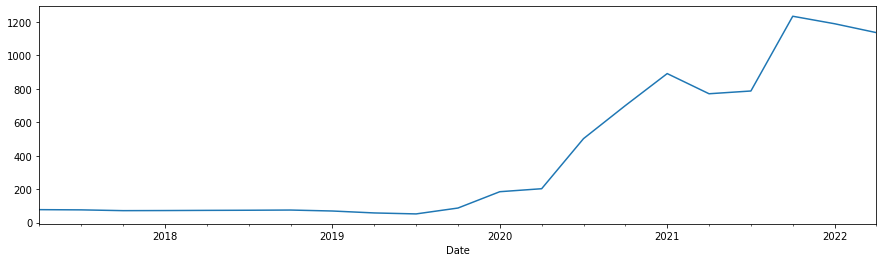

In [56]:
#Quaterly
df_tesla.resample(rule='QS').max()['Open'].plot(figsize=(15,4))

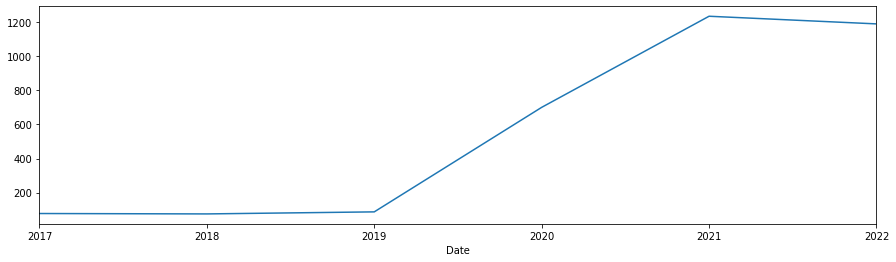

In [57]:
#Business 
df_tesla.resample(rule='BA').max()['Open'].plot(figsize=(15,4))

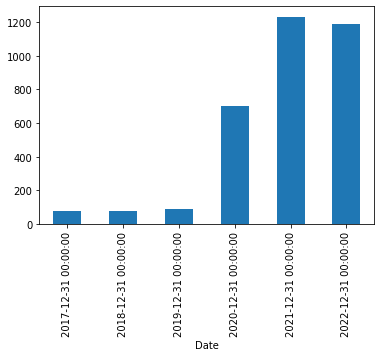

In [59]:
df_tesla['Open'].resample(rule='A').max().plot(kind='bar')

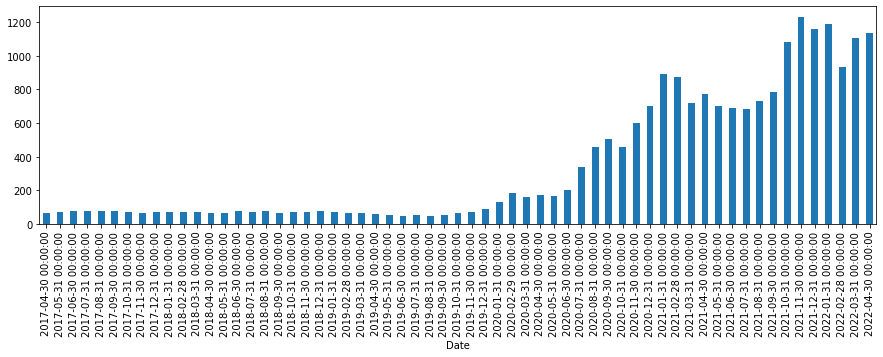

In [62]:
df_tesla.resample(rule='M').max()['Open'].plot(kind='bar',figsize=(15,4))

In [63]:
df_tesla['High'].rolling(12).mean().head(3)

Date
2017-04-17   NaN
2017-04-18   NaN
2017-04-19   NaN
Name: High, dtype: float64

In [64]:
df_tesla['Open30Roll'] = df_tesla['High'].rolling(30).mean()

In [66]:
df_tesla.head(31)

,Date,High,Low,Open,Close,Volume,Adj Close,Open30Roll
Date,,,,,,,,
2017-04-17,2017-04-17,60.799999,59.736000,60.540001,60.287998,20693500.0,60.287998,NaN
2017-04-18,2017-04-18,60.167999,59.580002,59.939999,60.049999,15178500.0,60.049999,NaN
2017-04-19,2017-04-19,61.324001,60.422001,60.492001,61.104000,19490000.0,61.104000,NaN
2017-04-20,2017-04-20,61.830002,60.046001,61.301998,60.501999,30747000.0,60.501999,NaN
2017-04-21,2017-04-21,61.279999,60.084000,60.400002,61.119999,22549000.0,61.119999,NaN
2017-04-24,2017-04-24,62.110001,61.203999,61.844002,61.605999,25417500.0,61.605999,NaN
2017-04-25,2017-04-25,62.796001,61.172001,61.599998,62.757999,33688500.0,62.757999,NaN
2017-04-26,2017-04-26,62.900002,61.799999,62.473999,62.034000,23475000.0,62.034000,NaN
2017-04-27,2017-04-27,62.618000,61.500000,62.338001,61.726002,17343000.0,61.726002,NaN


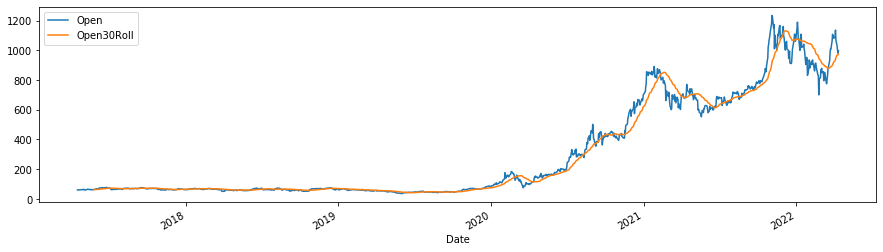

In [67]:
df_tesla[['Open','Open30Roll']].plot(figsize=(15,4))